### Task 1 - Bivariant and Multivariant Analysis

In [1]:
import matplotlib.pyplot as plt             
from tabulate import tabulate               
import matplotlib as mat                     
import seaborn as sns                       
import pandas as pd                         
import numpy as np    

In [2]:
df = pd.read_csv("DS1_C5_S2_EmployeeAttrition_Data_Practice.csv")

In [3]:
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,Sales,1,Life Sciences,1,2,Female,94,...,Yes,3,1,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,Research & Development,8,Life Sciences,2,3,Male,61,...,No,4,4,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,Research & Development,2,Other,4,4,Male,92,...,Yes,3,2,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,Research & Development,3,Life Sciences,5,4,Female,56,...,Yes,3,3,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,Research & Development,2,Medical,7,1,Male,40,...,No,3,4,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,No,NaN,Research & Development,23,Medical,2061,3,Male,41,...,No,3,3,17,3,3,5,2,0,3
1466,39.0,No,Travel_Rarely,Research & Development,6,Medical,2062,4,Male,42,...,No,3,1,9,5,3,7,7,1,7
1467,27.0,No,Travel_Rarely,Research & Development,4,Life Sciences,2064,2,Male,87,...,Yes,4,2,6,0,3,6,2,0,3
1468,49.0,No,Travel_Frequently,Sales,2,Medical,2065,4,Male,63,...,No,3,4,17,3,2,9,6,0,8


In [4]:
df.isnull().sum()

Age                         24
Attrition                    0
BusinessTravel              30
Department                   4
DistanceFromHome             0
EducationField              12
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                      45
HourlyRate                   0
JobInvolvement               0
JobRole                     10
JobSatisfaction              0
MaritalStatus               56
MonthlyIncome                0
NumCompaniesWorked           0
Over18                      54
OverTime                     0
PerformanceRating            0
RelationshipSatisfaction     0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsSinceLastPromotion      0
YearsWithCurrManager         0
dtype: int64

In [5]:
# separating  numeric and categorical columns
numeric_columns = []
categorical_columns = []

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        numeric_columns.append(column)
    else:
        categorical_columns.append(column)

table = [numeric_columns, categorical_columns]
print(tabulate({"numerical":numeric_columns,
                "categorical": categorical_columns}, headers = ["numerical", "categorical"]))

numerical                 categorical
------------------------  --------------
Age                       Attrition
DistanceFromHome          BusinessTravel
EmployeeNumber            Department
EnvironmentSatisfaction   EducationField
HourlyRate                Gender
JobInvolvement            JobRole
JobSatisfaction           MaritalStatus
MonthlyIncome             Over18
NumCompaniesWorked        OverTime
PerformanceRating
RelationshipSatisfaction
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


####  1) business travel category wise employee attrition using a count plot

In [6]:
#finding out null values 

def info_of_cat(col):
    print(f"Unique values in {col} are :{df[col].unique()}")
    print(f"Mode of {col} is : {df[col].mode()[0]}")
    print(f"Number of missing values in {col} is : {df[col].isnull().sum()}")

In [7]:
info_of_cat("BusinessTravel")

Unique values in BusinessTravel are :['Travel_Rarely' 'Travel_Frequently' 'Non-Travel' nan]
Mode of BusinessTravel is : Travel_Rarely
Number of missing values in BusinessTravel is : 30


In [8]:
df["BusinessTravel"].fillna("Travel_Rarely",inplace=True)

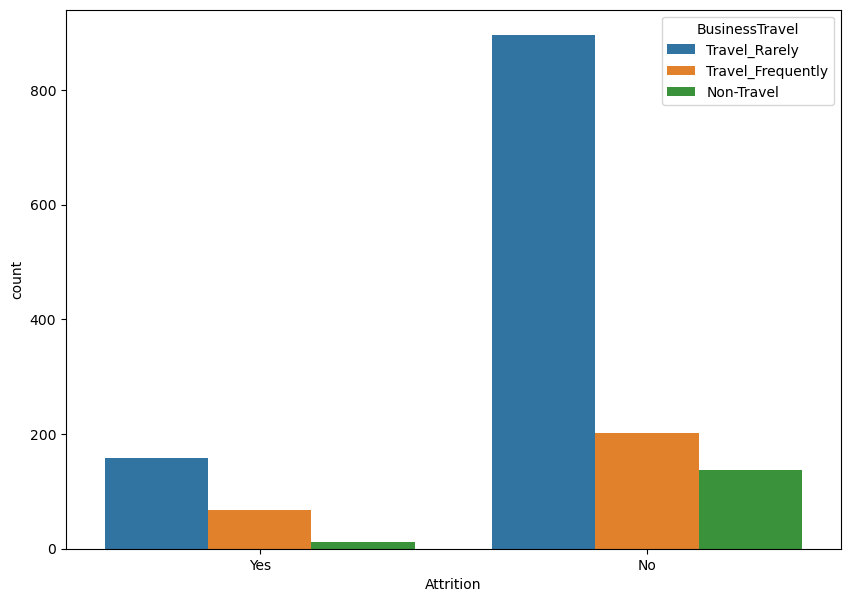

In [9]:
# business travel category wise employee attrition using a count plot

fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "Attrition", hue = "BusinessTravel", data = df)
plt.show()

Interpretation - Here attrition of employees No is higher than Yes and travel rarely is higher than all of that 

#### 2) Education field wise attrition using a bar chart


In [10]:
info_of_cat("EducationField")

Unique values in EducationField are :['Life Sciences' 'Other' 'Medical' 'Marketing' nan 'Technical Degree'
 'Human Resources']
Mode of EducationField is : Life Sciences
Number of missing values in EducationField is : 12


In [11]:
df["EducationField"].fillna("Life Sciences",inplace=True)

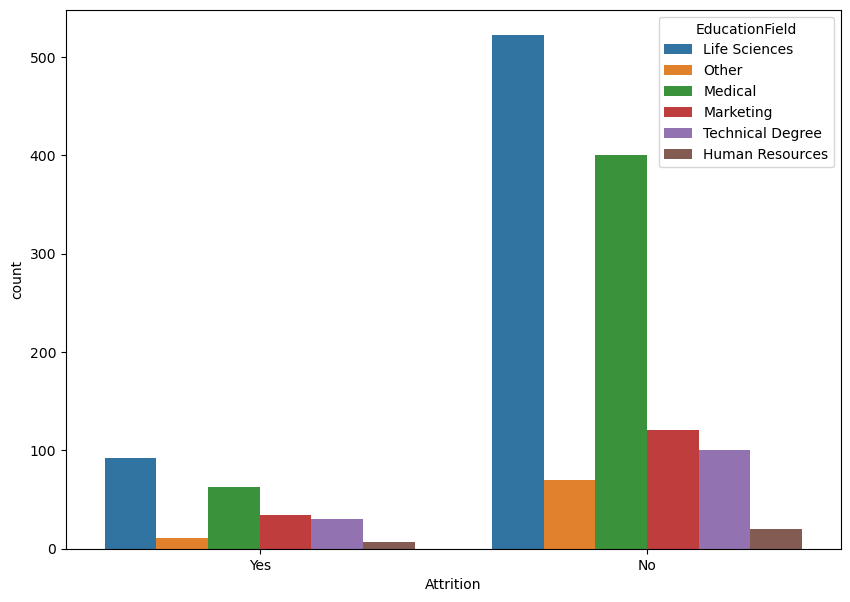

In [12]:
# Education field wise attrition using a bar chart

fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "Attrition", hue = "EducationField", data = df)
plt.show()

Interpretation - Here Attrition of employees not going out is higher than the employees in the leaving the organisation and Life Sciences ,education field is highly prefer than other educationfield

#### 3) Department wise employee Attrition using a bar chart 

In [13]:
info_of_cat("Department")

Unique values in Department are :['Sales' 'Research & Development' 'Human Resources' nan]
Mode of Department is : Research & Development
Number of missing values in Department is : 4


In [14]:
df["Department"].fillna("Research & Development",inplace=True)

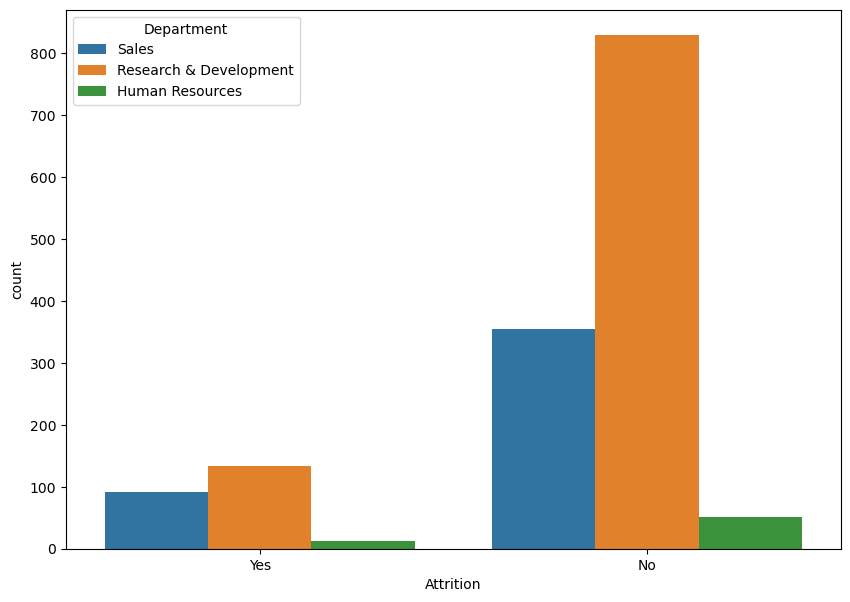

In [15]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "Attrition", hue = "Department", data = df)
plt.show()

Interpretation - Here Attrition of employees not going out is higher than the employees leaving  the organisation . Employees are higher in Research and development than other department.

#### 4) Environment satisfaction score wise employee attrition using a bar chart 

In [16]:
info_of_cat("EnvironmentSatisfaction")

Unique values in EnvironmentSatisfaction are :[2 3 4 1]
Mode of EnvironmentSatisfaction is : 3
Number of missing values in EnvironmentSatisfaction is : 0


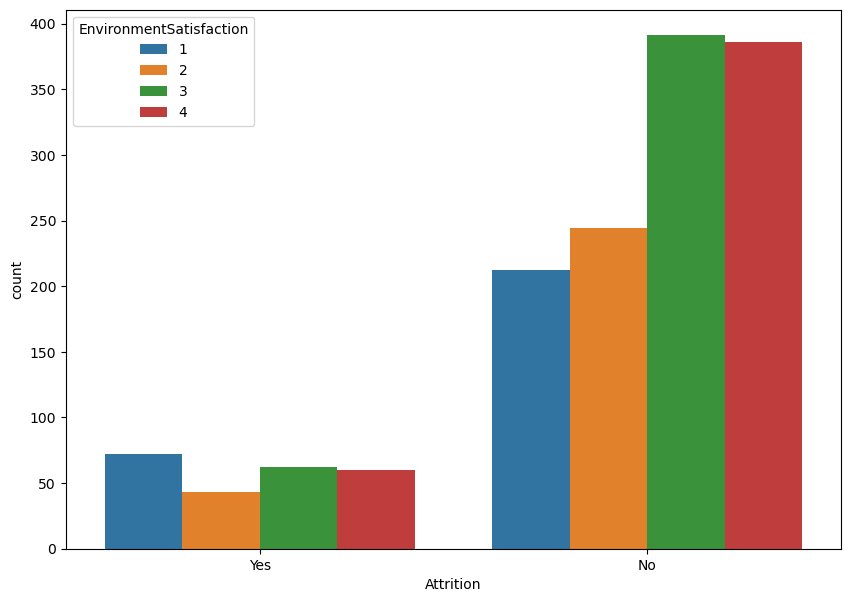

In [17]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "Attrition", hue = "EnvironmentSatisfaction", data = df)
plt.show()

Interpretation -  Here Attrition of employees not going out is higher than the employees leaving the organisation and the EnvironmentalSatisfaction score 4 is high than the other 3.

#### 5) Gender column to display the Gender wise attrition using a count plot chart 

In [18]:
info_of_cat("Gender")

Unique values in Gender are :['Female' 'Male' nan]
Mode of Gender is : Male
Number of missing values in Gender is : 45


In [19]:
df["Gender"].fillna("Male",inplace=True)

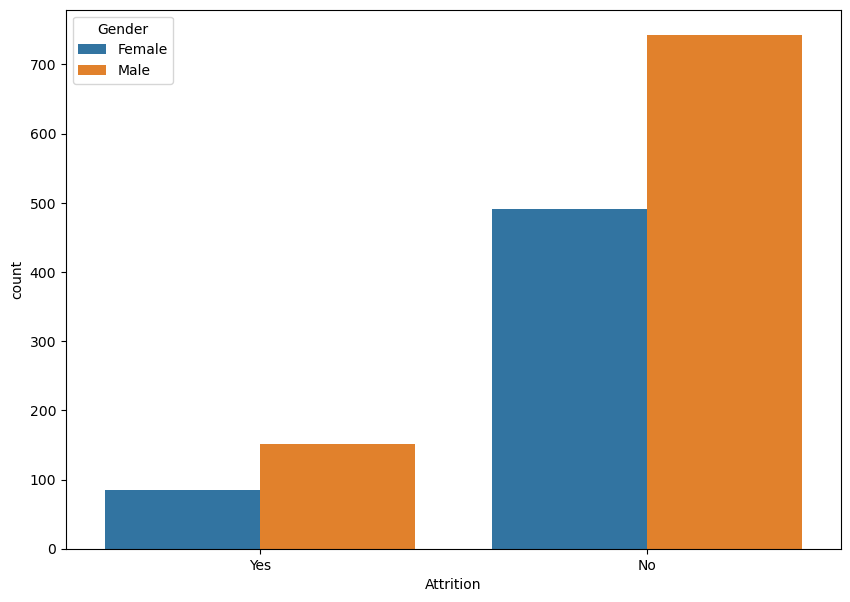

In [20]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "Attrition", hue = "Gender", data = df)
plt.show()

Interpretation - The male employees are higher than the female employees in the organisation.

#### 6) Marital status column to display the marital status wise attrition of employees

In [21]:
info_of_cat("MaritalStatus")

Unique values in MaritalStatus are :['Single' 'Married' nan 'Divorced']
Mode of MaritalStatus is : Married
Number of missing values in MaritalStatus is : 56


In [22]:
df["MaritalStatus"].fillna("Married",inplace=True)

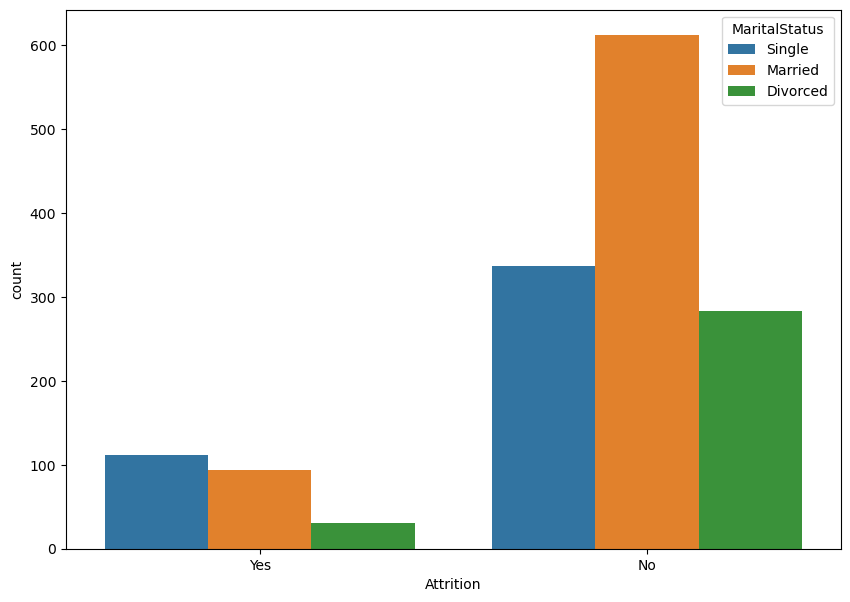

In [23]:
# Marital status column to display the marital status wise attrition of employees

fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "Attrition", hue = "MaritalStatus", data = df)
plt.show()

Interpretation - Here Attrition of employees in the organisation is higher than the employees leaving the organisation and the married are higher in the organisation

#### 7) Overtime with attrition of employees using pie chart 

In [24]:
info_of_cat("OverTime")

Unique values in OverTime are :['Yes' 'No']
Mode of OverTime is : No
Number of missing values in OverTime is : 0


In [25]:
df1 = df[(df["Attrition"]=="Yes")]
df1

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,Sales,1,Life Sciences,1,2,Female,94,...,Yes,3,1,8,0,1,6,4,0,5
2,37.0,Yes,Travel_Rarely,Research & Development,2,Other,4,4,Male,92,...,Yes,3,2,7,3,3,0,0,0,0
14,28.0,Yes,Travel_Rarely,Research & Development,24,Life Sciences,19,3,Male,50,...,Yes,3,2,6,4,3,4,2,0,3
21,36.0,Yes,Travel_Rarely,Sales,9,Life Sciences,27,3,Male,82,...,No,4,2,10,4,3,5,3,0,3
24,34.0,Yes,Travel_Rarely,Research & Development,6,Medical,31,2,Male,83,...,No,3,3,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23.0,Yes,Travel_Frequently,Sales,9,Marketing,2023,4,Male,33,...,No,3,1,1,3,2,1,0,1,0
1442,29.0,Yes,Travel_Rarely,Research & Development,1,Medical,2027,1,Male,36,...,Yes,3,2,4,3,4,2,2,2,2
1444,56.0,Yes,Travel_Rarely,Research & Development,7,Technical Degree,2032,4,Male,72,...,No,3,4,14,4,1,10,9,9,8
1452,50.0,Yes,Travel_Rarely,Sales,1,Life Sciences,2044,2,Male,94,...,No,3,4,12,3,3,6,3,0,1


#### 8) Overtime with attrition of employees using pie chart 

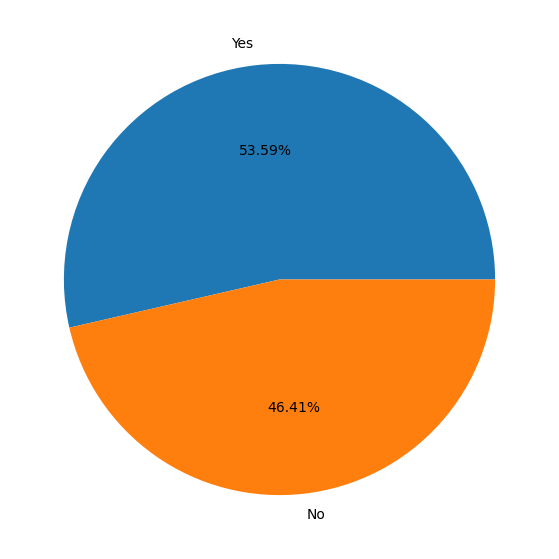

In [26]:
fig,ax = plt.subplots(figsize=(10,7))
#ax[0].set_title("Count of Overtime of employees")
percentage = df1["OverTime"].value_counts()
labels = list(df1["OverTime"].value_counts().index)

#sns.countplot(x=df["OverTime"],ax=ax[0])
plt.pie(percentage,labels= labels,autopct="%0.2f%%")

plt.show()


Interpretation - Here we can see that the most of the employees who are leaving the organisation are working in over time. 

#### 9) Performance rate wise attriton of employees using count plot

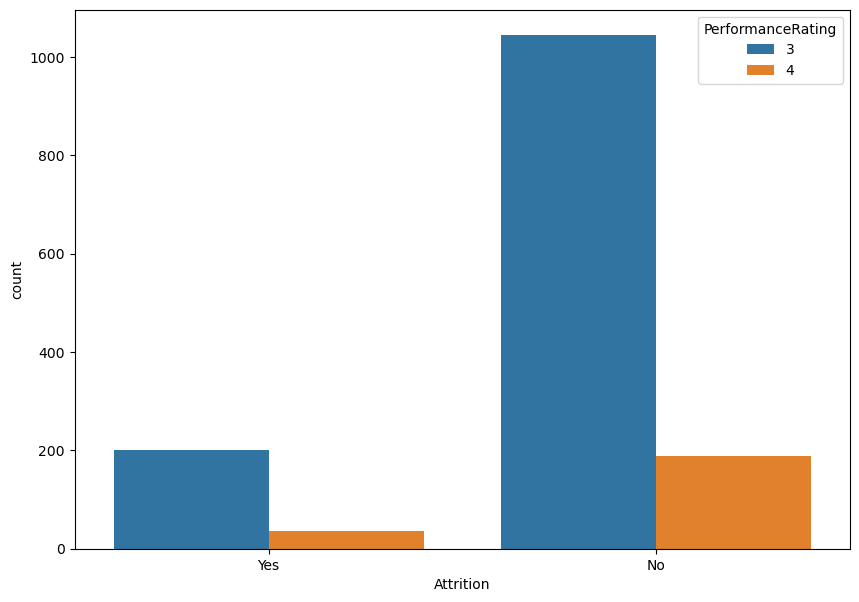

In [27]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "Attrition", hue = "PerformanceRating", data = df)
plt.show()

Interpretation - Here the employees leaving the organisation and employees in the organiation wsie performance rating

#### 10 ) Job satisfaction wise attrition of employees using count plot 

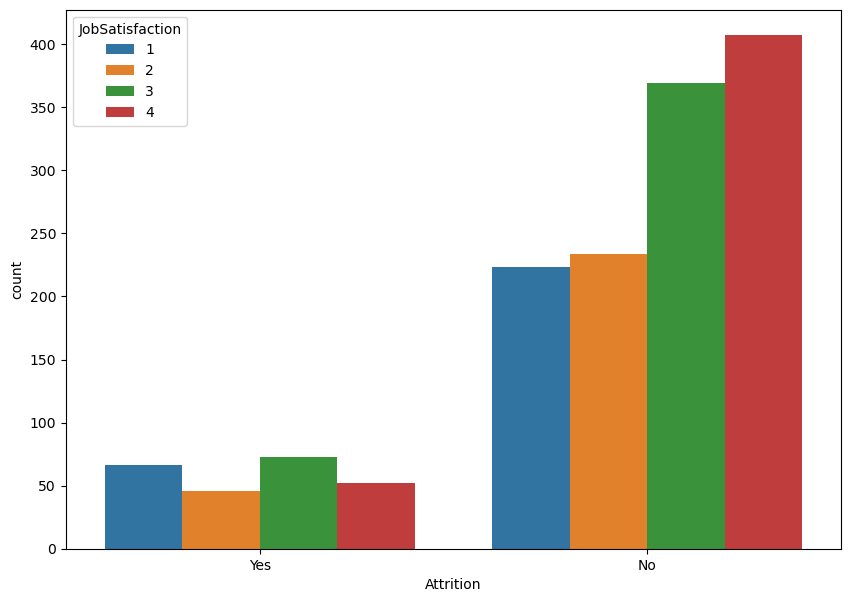

In [28]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "Attrition", hue = "JobSatisfaction", data = df)
plt.show()

Interpretation - Here i have displayed the attrition wise employees satisfaction  of employees.

### Task 2  - Perform bivariant analysis by using graph and charts

In [29]:
df.isnull().sum()

Age                         24
Attrition                    0
BusinessTravel               0
Department                   0
DistanceFromHome             0
EducationField               0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobRole                     10
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
NumCompaniesWorked           0
Over18                      54
OverTime                     0
PerformanceRating            0
RelationshipSatisfaction     0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsSinceLastPromotion      0
YearsWithCurrManager         0
dtype: int64

In [30]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

#### 1) Age column to display age group wise attrition of employees

In [31]:
info_of_numerical("Age")

The mean of the Age is 36.93015214384509
The median of the Age is 36.0
The mode of the Age is 34.0
The standard deviation of the Age is 9.16220404447615
Number of missing values in the Age is 24


In [32]:
df["Age"].fillna(24,inplace=True)

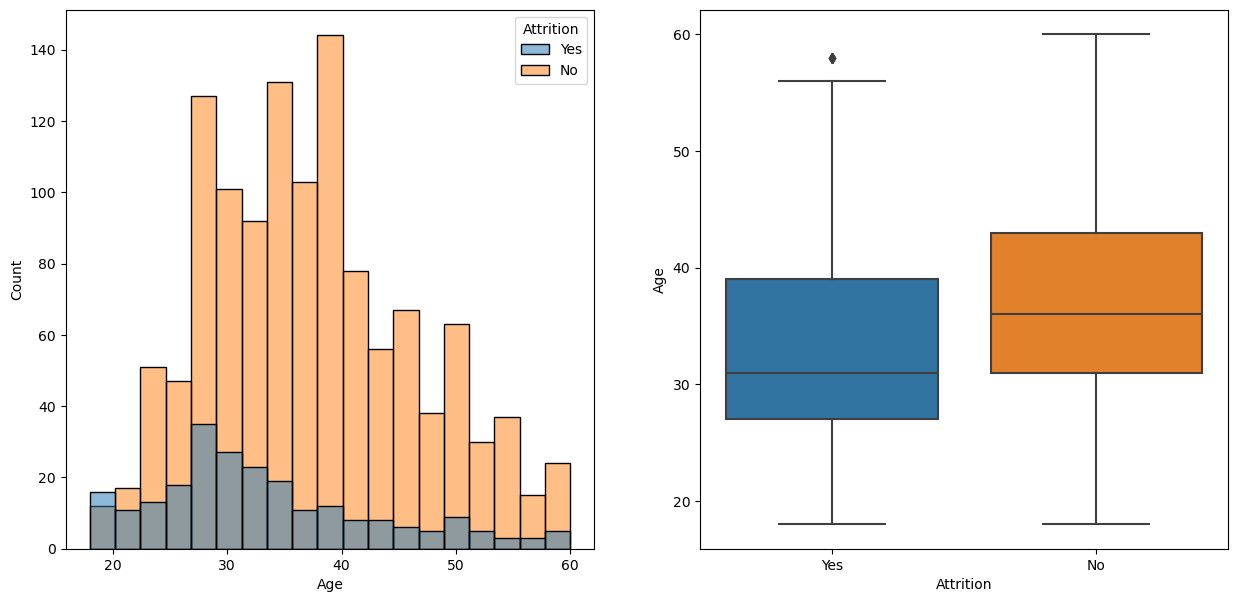

In [33]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["Age"], hue = df["Attrition"], ax = ax[0])
sns.boxplot(x = df["Attrition"] ,y = df["Age"] , ax = ax[1])
plt.show()

interpretation - First i have cleaned the data because there are some null values are present .then i have displayed the attrition wise age group of employees by using histogram and boxplot.

####  2) Hourly rate column to display the hourly wise employee attrition

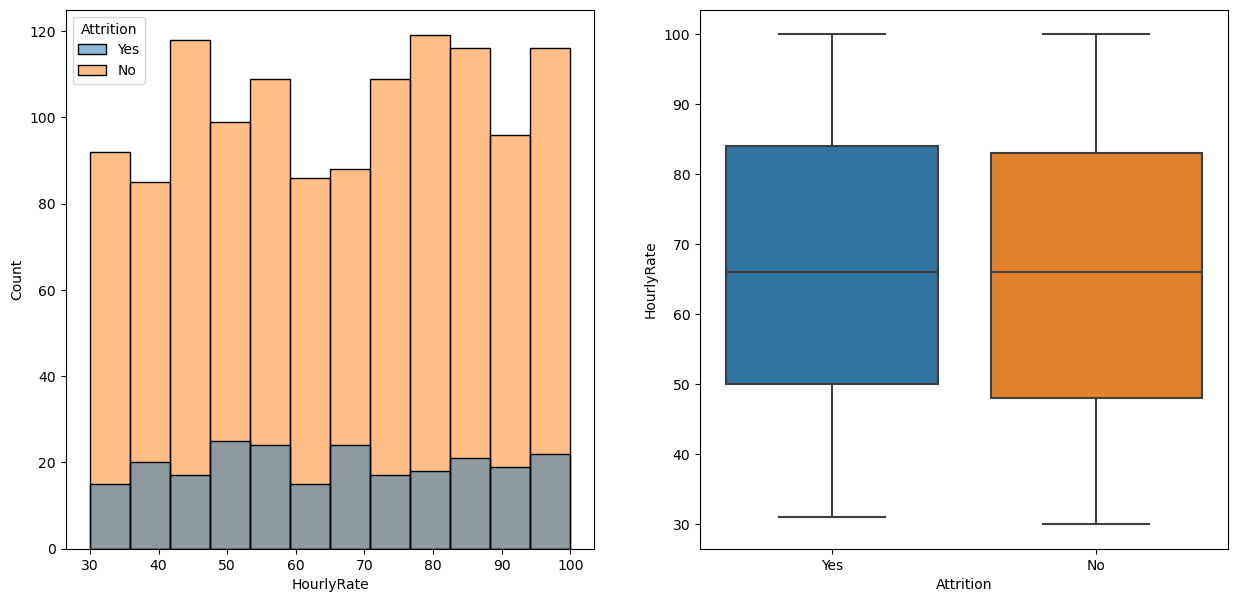

In [34]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["HourlyRate"], hue = df["Attrition"], ax = ax[0])
sns.boxplot(x = df["Attrition"] ,y = df["HourlyRate"] , ax = ax[1])
plt.show()

Interpretation - Here i have displayed the Hourly rate column to display the hourly wise employee attrition by using Histogram and boxplot

#### 3) Monthly income column to display the monthly income wise attrition of employees 

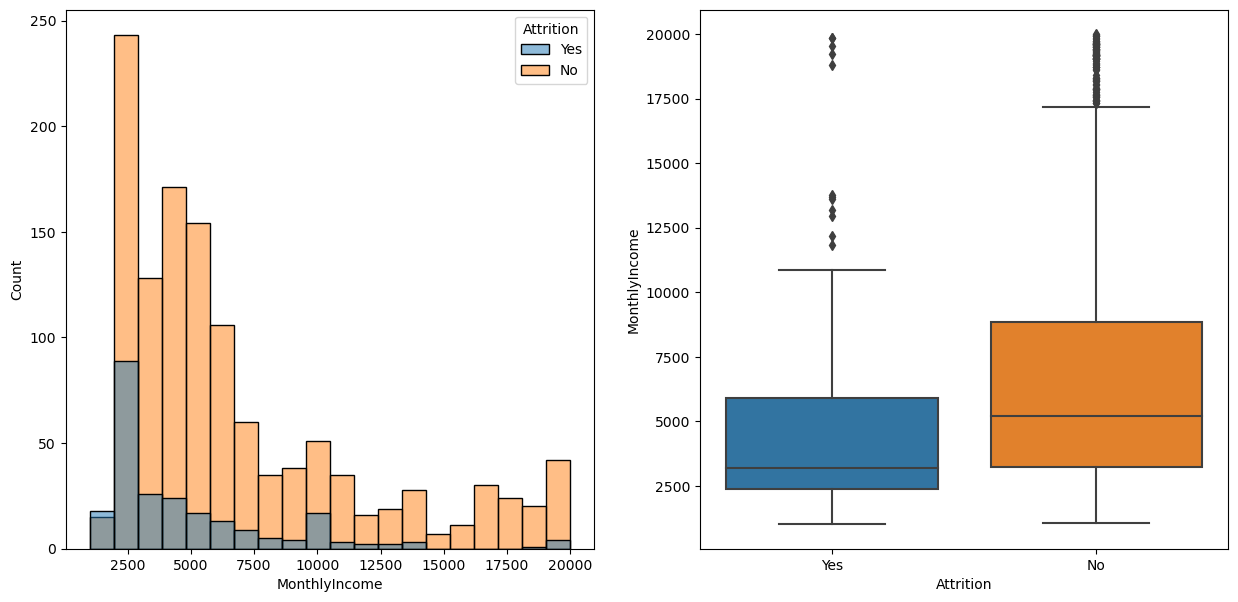

In [35]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["MonthlyIncome"], hue = df["Attrition"], ax = ax[0])
sns.boxplot(x = df["Attrition"] ,y = df["MonthlyIncome"] , ax = ax[1])
plt.show()

Interpretation - Here i have displayed the Monthly income column to display the monthly income wise attrition of employees 

#### 4) Distance from home column to display the distance wise employees attrition 

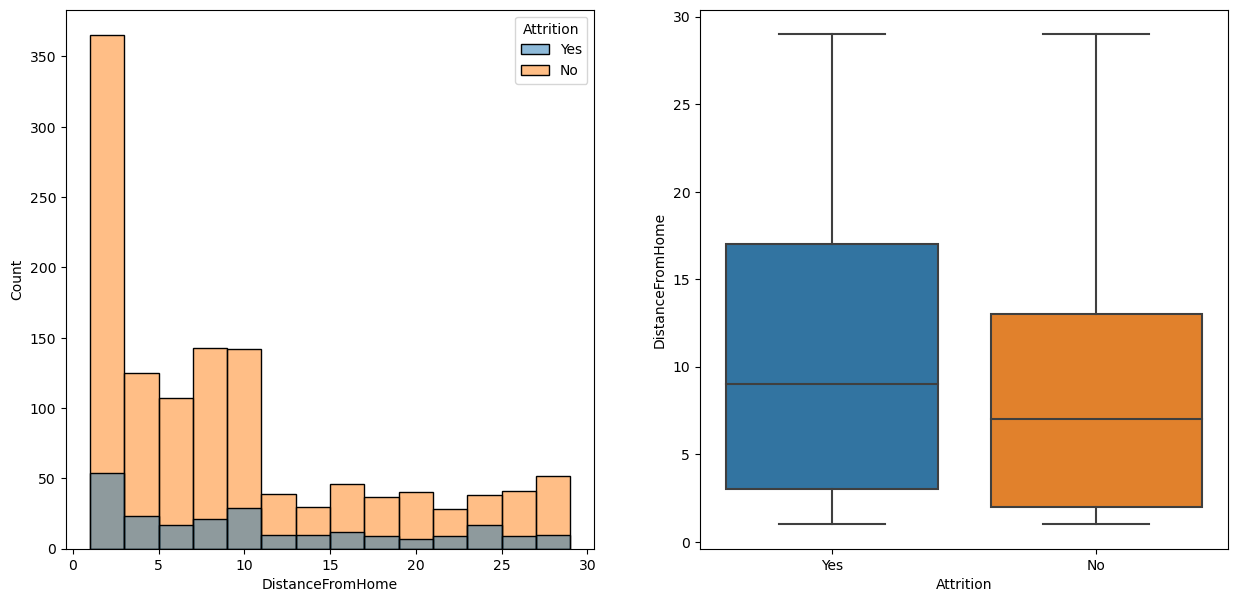

In [36]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["DistanceFromHome"], hue = df["Attrition"], ax = ax[0])
sns.boxplot(x = df["Attrition"] ,y = df["DistanceFromHome"] , ax = ax[1])
plt.show()

Interpretation - Here i have displayed the Distance from home column to display the distance wise employees attrition 

#### 5) Total working years column to display the experience by attrition of employees 

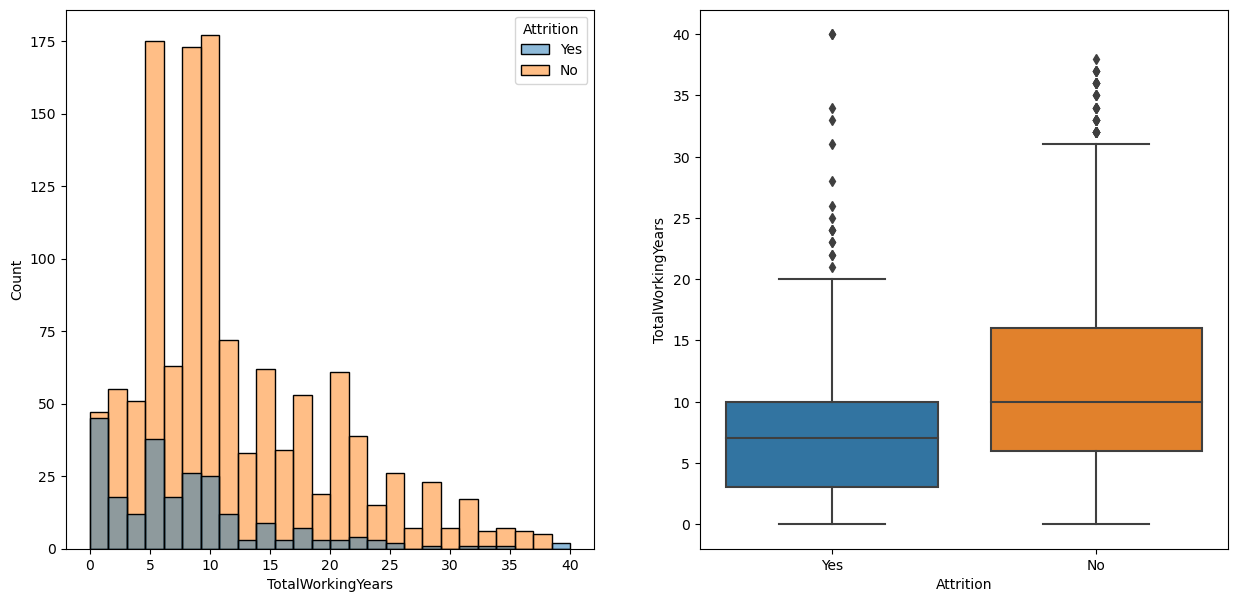

In [37]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["TotalWorkingYears"], hue = df["Attrition"], ax = ax[0])
sns.boxplot(x = df["Attrition"] ,y = df["TotalWorkingYears"] , ax = ax[1])
plt.show()

Interpretation - Here i have displayed the Total working years column to display the experience by attrition of employees by using histogram and boxplot

### Task 3 - Visualize the job role wise attrited employees 

In [53]:
df1 = df[(df["BusinessTravel"]=="Travel_Rarely")]

In [54]:
df1

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,Sales,1,Life Sciences,1,2,Female,94,...,Yes,3,1,8,0,1,6,4,0,5
2,37.0,Yes,Travel_Rarely,Research & Development,2,Other,4,4,Male,92,...,Yes,3,2,7,3,3,0,0,0,0
4,27.0,No,Travel_Rarely,Research & Development,2,Medical,7,1,Male,40,...,No,3,4,6,3,3,2,2,2,2
6,59.0,No,Travel_Rarely,Research & Development,3,Medical,10,3,Female,81,...,Yes,4,1,12,3,2,1,0,0,0
7,30.0,No,Travel_Rarely,Research & Development,24,Life Sciences,11,4,Male,67,...,No,4,2,1,2,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,26.0,No,Travel_Rarely,Sales,5,Other,2060,4,Female,30,...,No,3,4,5,2,3,4,2,0,0
1465,36.0,No,Travel_Rarely,Research & Development,23,Medical,2061,3,Male,41,...,No,3,3,17,3,3,5,2,0,3
1466,39.0,No,Travel_Rarely,Research & Development,6,Medical,2062,4,Male,42,...,No,3,1,9,5,3,7,7,1,7
1467,27.0,No,Travel_Rarely,Research & Development,4,Life Sciences,2064,2,Male,87,...,Yes,4,2,6,0,3,6,2,0,3


In [55]:
info_of_cat("JobRole")

Unique values in JobRole are :['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Mode of JobRole is : Sales Executive
Number of missing values in JobRole is : 0


In [56]:
df["JobRole"].fillna("Sales Executive",inplace=True)

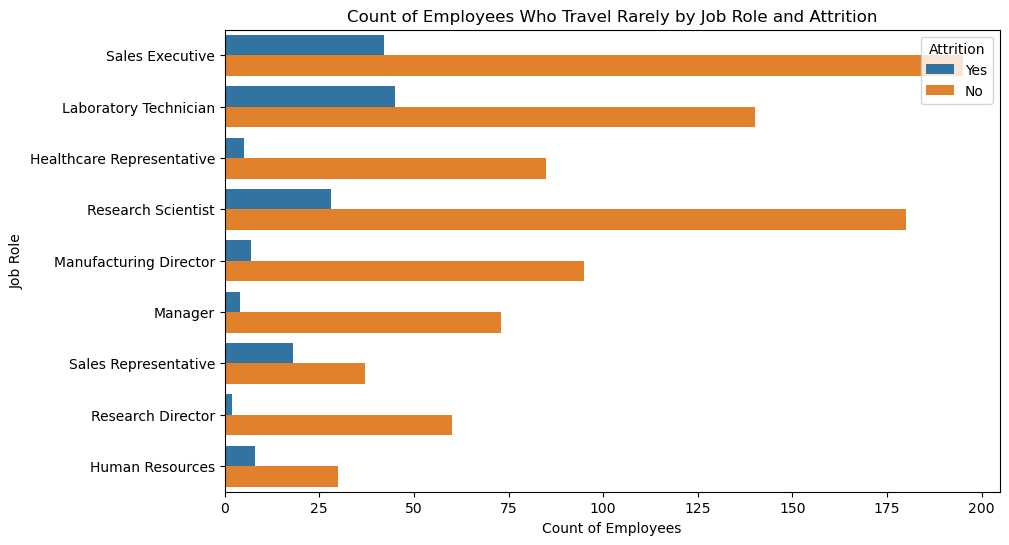

In [82]:
# Filter the DataFrame to include only employees who travel rarely

plt.figure(figsize=(10, 6))  

# Create a count plot to show the count of employees by job role and attrition
sns.countplot(y="JobRole" , hue="Attrition", data=df1)

plt.xlabel("Count of Employees") 
plt.ylabel("Job Role")  
plt.title("Count of Employees Who Travel Rarely by Job Role and Attrition")  # Title for the chart
plt.legend(title="Attrition", loc="upper right")  # Add a legend for attrition
plt.show()



Interpretation - Here i displayed the job role wise TTrited employees who travel rarely and displayed output by using Horizontal bar chart 

### Task 4 - job role wise employee attrition for Life sciences and Medical backround 

In [43]:
df2 = df[(df["EducationField"] == "Life Sciences")   |(df["EducationField"] == "Medical")]


In [44]:
df2

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,Sales,1,Life Sciences,1,2,Female,94,...,Yes,3,1,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,Research & Development,8,Life Sciences,2,3,Male,61,...,No,4,4,10,3,3,10,7,1,7
3,33.0,No,Travel_Frequently,Research & Development,3,Life Sciences,5,4,Female,56,...,Yes,3,3,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,Research & Development,2,Medical,7,1,Male,40,...,No,3,4,6,3,3,2,2,2,2
5,32.0,No,Travel_Frequently,Research & Development,2,Life Sciences,8,4,Male,79,...,No,3,3,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,No,Travel_Rarely,Research & Development,23,Medical,2061,3,Male,41,...,No,3,3,17,3,3,5,2,0,3
1466,39.0,No,Travel_Rarely,Research & Development,6,Medical,2062,4,Male,42,...,No,3,1,9,5,3,7,7,1,7
1467,27.0,No,Travel_Rarely,Research & Development,4,Life Sciences,2064,2,Male,87,...,Yes,4,2,6,0,3,6,2,0,3
1468,49.0,No,Travel_Frequently,Sales,2,Medical,2065,4,Male,63,...,No,3,4,17,3,2,9,6,0,8


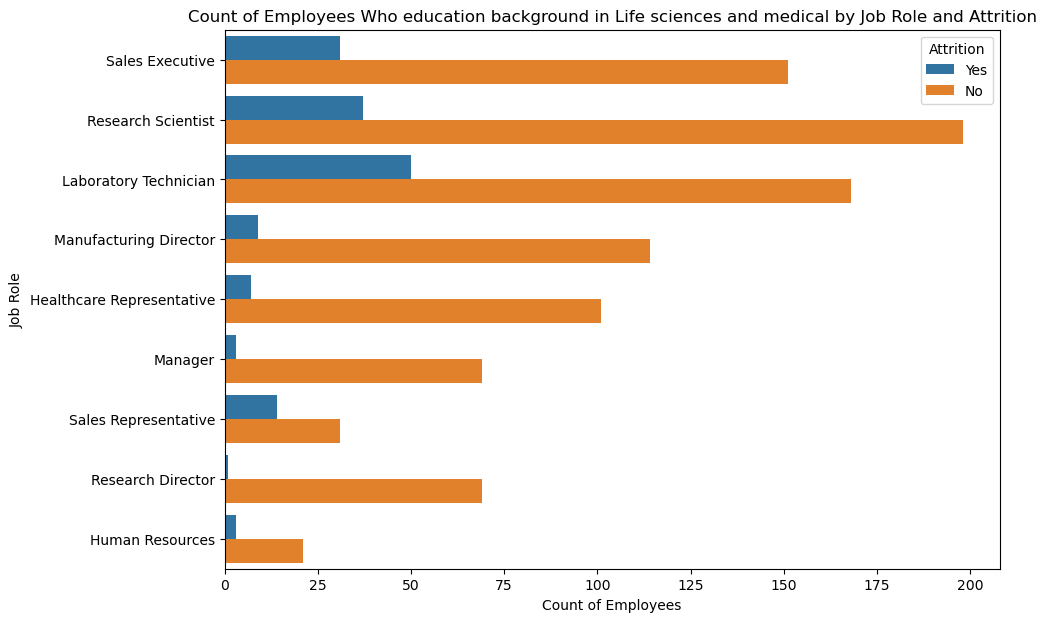

In [79]:
plt.figure(figsize=(10,7))

sns.countplot(y="JobRole" , hue="Attrition" , data = df2 )

plt.xlabel("Count of Employees") 
plt.ylabel("Job Role")  
plt.title("Count of Employees Who education background in Life sciences and medical by Job Role and Attrition")  # Title for the chart
plt.legend(title="Attrition", loc="upper right")  # Add a legend for attrition
plt.show()

Interpretation - here i have displayed the JobRole wise Attrition of employees whose education backrounds are from Life sciences and Medical

### Task 5 - Gender wise employee attrition in sales department

In [66]:
gen = df[(df["Department"]=="Sales")]

In [67]:
gen

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,Sales,1,Life Sciences,1,2,Female,94,...,Yes,3,1,8,0,1,6,4,0,5
18,53.0,No,Travel_Rarely,Sales,2,Life Sciences,23,1,Female,78,...,No,3,3,31,3,3,25,8,3,7
21,36.0,Yes,Travel_Rarely,Sales,9,Life Sciences,27,3,Male,82,...,No,4,2,10,4,3,5,3,0,3
27,42.0,No,Travel_Rarely,Sales,8,Marketing,35,3,Male,48,...,No,3,4,10,2,3,9,7,4,2
29,46.0,No,Travel_Rarely,Sales,2,Marketing,38,2,Female,83,...,No,3,4,22,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,45.0,No,Travel_Rarely,Sales,20,Life Sciences,2046,4,Female,50,...,No,3,3,8,3,3,5,3,0,1
1461,50.0,Yes,Travel_Rarely,Sales,28,Marketing,2055,4,Male,39,...,Yes,3,2,20,3,3,3,2,2,0
1462,39.0,No,Travel_Rarely,Sales,24,Life Sciences,2056,2,Female,60,...,No,3,1,21,2,2,20,9,9,6
1464,26.0,No,Travel_Rarely,Sales,5,Other,2060,4,Female,30,...,No,3,4,5,2,3,4,2,0,0


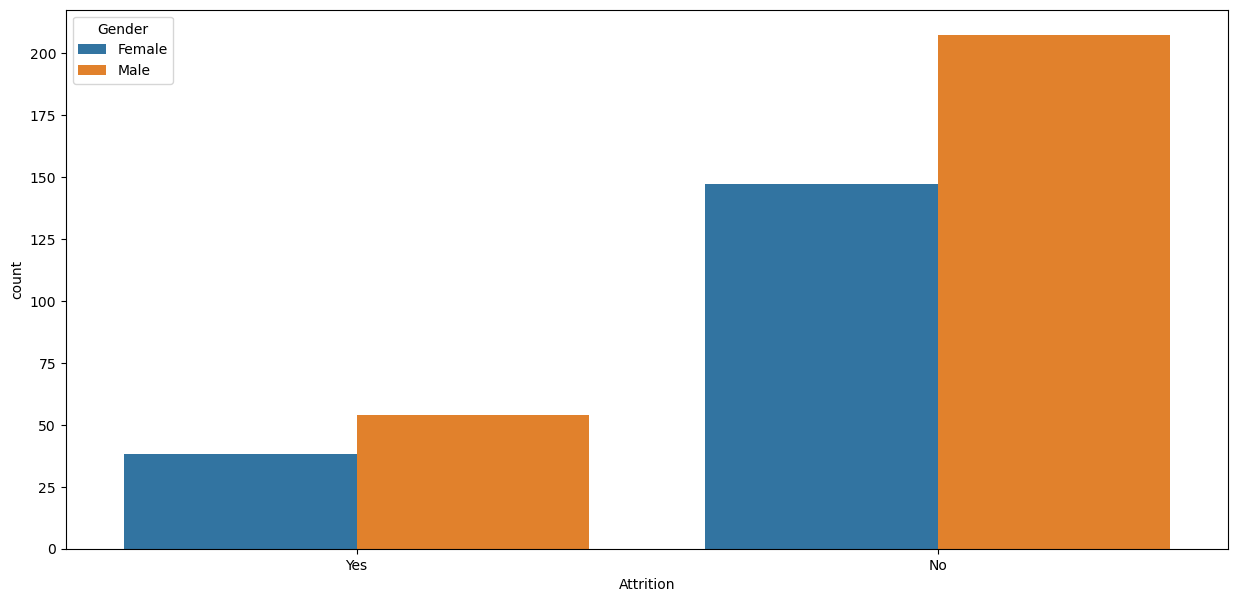

In [86]:
fig,ax = plt.subplots(figsize = (15,7))
sns.countplot( x= "Attrition" , hue = "Gender" , data=gen)
plt.show()

Interpretation - here in this task i have displayed the gender wise employees attrition in sales department| 